In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_context('notebook')
sns.set_style('darkgrid')
import sklearn as skl
import sklearn.metrics
import sklearn.learning_curve
import sklearn.ensemble
import sklearn.dummy
import sklearn.grid_search
import sklearn.feature_extraction
import sklearn.feature_extraction.text
import numpy as np

import sys
sys.path = sys.path + ['..']
import get_airbnb_data
import db
import learning
import imp
imp.reload(learning)
from learning import *

In [2]:
engine = db.create_root_engine()
rawtable = pd.io.sql.read_sql_table('listings', engine, index_col='id')

In [7]:
def include_unrated(rating):
    if not np.isfinite(rating):
        return 'Unrated'
    else:
        return rating
rawtable.rating.map(include_unrated)

id
air100002         4.5
air1000083        4.5
air1000186        4.5
air1000199        4.7
air1000202          5
air1000264        4.5
air100042           5
air1000522          5
air100074           4
air1000755        4.5
air1000871        3.5
air100097           5
air1000995    Unrated
air1000998          5
air1001065        4.5
air1001139        4.5
air1001145        4.5
air1001147          5
air1001160          5
air1001265        4.5
air1001273          4
air1001294        4.5
air1001353          5
air1001367          5
air1001405          4
air100142         4.5
air1001447          5
air1001469          5
air1001534          5
air1001567          5
               ...   
air9985           4.5
air998663           5
air99869            5
air998701           5
air998708         4.5
air998739     Unrated
air998741         4.5
air998782         4.5
air998810           5
air998821           5
air998843           5
air998887           5
air998896     Unrated
air998899           5
air9989

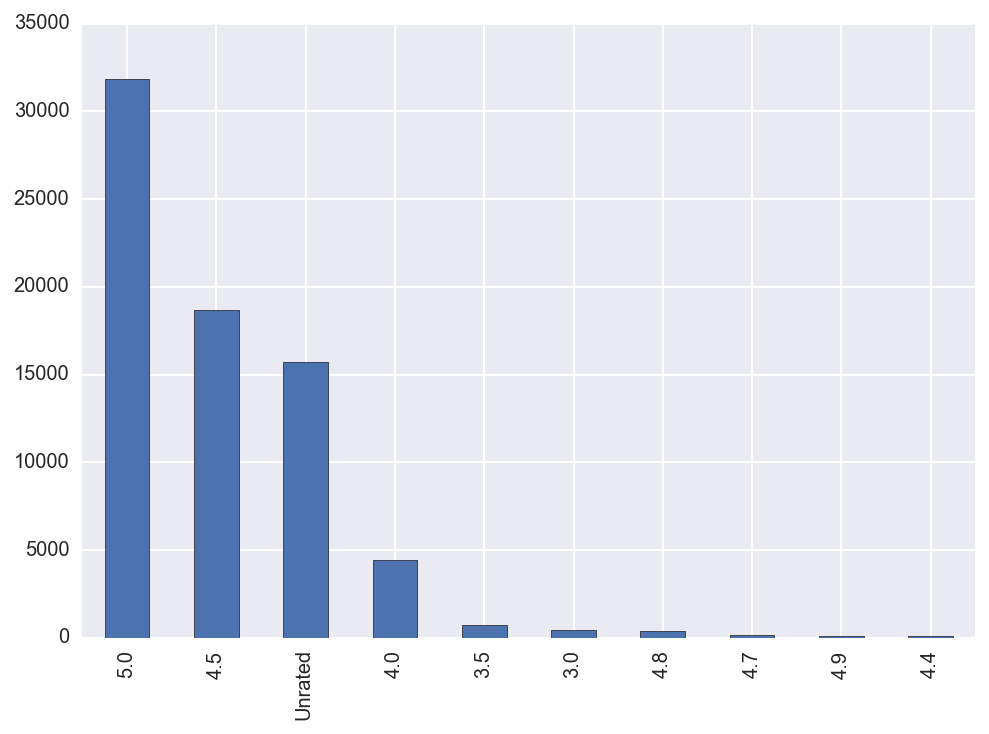

In [11]:
rawtable.rating.map(include_unrated).value_counts()[:10].plot(kind='bar')

In [13]:
len(rawtable)

72983

In [12]:
rawtable.rating.map(include_unrated).value_counts()

5.0        31840
4.5        18701
Unrated    15727
4.0         4416
3.5          702
3.0          425
4.8          351
4.7          175
4.9           97
4.4           92
4.3           80
2.0           68
4.1           62
4.6           51
1.0           46
2.5           44
3.8           24
3.7           16
3.4           12
4.2           11
3.9            7
2.8            7
3.3            6
1.5            4
3.1            3
2.3            3
3.6            3
2.4            3
2.1            2
1.7            1
2.7            1
1.6            1
1.8            1
2.6            1
dtype: int64

In [14]:
15727/72983

0.21548853842675691